# Reinforcement Learning Final Project 

Welcome to your Reinforcement Learning project focused on developing an RL agent capable of playing chess at a strategic level. Chess has long been considered a benchmark for measuring AI capabilities, and this project aims to leverage the power of RL to create an intelligent agent that can make optimal decisions in complex chess positions. By combining the principles of reinforcement learning with the rich strategic domain of chess, you will explore new approaches to create the most effective chess player.

## Project Objectives:

* Train an RL agent to play chess: The primary objective of this project is to develop an RL agent that can play chess at a high level of proficiency. The agent should be capable of evaluating chess positions and making strategic decisions.

* Optimize decision-making using RL algorithms: Explore different RL algorithms, as seen in class, to train the agent. Compare and analise their effectiveness in learning and decision-making capabilities in the context of chess.

* Use a challenging chess environment: Use a comprehensive environment for the agent to interact with, representing the rules and dynamics of chess. This environment will provide a realistic and challenging setting for the agent's training and evaluation.

* Evaluate and benchmark performance: Assess the performance of the RL agent against different benchmarks from existing chess engines. You will compare your agent's performance to established chess engines to measure progress and identify areas for improvement.


### Extra Objectives:

* Investigate transfer learning and generalization: Explore techniques for transfer learning to leverage knowledge acquired in related domains or from pre-training on large chess datasets. Investigate the agent's ability to generalize its knowledge.

* Enhance interpretability and analysis: Develop methods to analise the agent's decision-making process and provide insights into its strategic thinking. Investigate techniques to visualize the agent's evaluation of chess positions and understand its reasoning behind specific moves.

## Let's Play Chess! 

As you know [Chess](https://en.wikipedia.org/wiki/Chess) is a board game for two players, called White and Black, each controlling an army of chess pieces in their color, with the objective to checkmate the opponent's king.

Chess is an abstract strategy game that involves no hidden information and no use of dice or cards. It is played on a chessboard with 64 squares arranged in an eight-by-eight grid. At the start, each player controls sixteen pieces: one king, one queen, two rooks, two bishops, two knights, and eight pawns. White moves first, followed by Black. Checkmating the opponent's king involves putting the king under immediate attack (in "check") whereby there is no way for it to escape.


![](Images/CHESS_MOVES.PNG)

* The king moves one square in any direction. There is also a special move called castling that involves moving the king and a rook. The king is the most valuable piece — attacks on the king must be immediately countered, and if this is impossible, the game is immediately lost.
* A rook can move any number of squares along a rank or file, but cannot leap over other pieces. Along with the king, a rook is involved during the king's castling move.
* A bishop can move any number of squares diagonally, but cannot leap over other pieces.
* A queen combines the power of a rook and bishop and can move any number of squares along a rank, file, or diagonal, but cannot leap over other pieces.
* A knight moves to any of the closest squares that are not on the same rank, file, or diagonal. (Thus the move forms an "L"-shape: two squares vertically and one square horizontally, or two squares horizontally and one square vertically.) The knight is the only piece that can leap over other pieces.
* A pawn can move forward to the unoccupied square immediately in front of it on the same file, or on its first move it can advance two squares along the same file, provided both squares are unoccupied (black dots in the diagram). A pawn can capture an opponent's piece on a square diagonally in front of it by moving to that square (black crosses). It cannot capture a piece while advancing along the same file. A pawn has two special moves: the en passant capture and promotion.

## The [Environment](https://github.com/iamlucaswolf/gym-chess)

The environment gym-chess provides OpenAI Gym environments for the game of Chess. It comes with an implementation of the board and move encoding used in AlphaZero. 

Please install it using the command: 

`pip install gym-chess`

In [1]:
#pip install gym-chess

In [2]:
import chess
import gym
import gym_chess
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm

In [3]:
import random
#import gymnasium as gym
#import numpy as np
from collections import deque
#import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam

import cv2

import time
from tqdm.notebook import tqdm
from moviepy.editor import ImageSequenceClip
from IPython.display import clear_output

2023-06-23 17:06:31.553515: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
# Set the seed for NumPy
np.random.seed(42)

# Set the seed for TensorFlow
tf.random.set_seed(42)

#set seed for random
random.seed(42)

### A Two player's game

As you know chess is played by two players, as such the gym-chess environment gives you access to both players actions in a sequential matter.

In [4]:
import chess

In [6]:
def WHITE_PLAYER_POLICY(env, state):
    legal_actions = env.legal_actions
    action = np.random.choice(legal_actions)

    return action


def BLACK_PLAYER_POLICY(env, state):
    legal_actions = env.legal_actions
    action = np.random.choice(legal_actions)

    return action

In [7]:
env = gym.make(
    "ChessAlphaZero-v0"
)  # We will use Alpha Zero's numenclature for the actions encodings

state = env.reset()
done = False
counter = 0  # Since each step represents a play in a chess game we are going to store the number of steps associated to the episode/game

while not done:
    if (
        counter % 2 == 0
    ):  # If the step number is even, this means that it is the WHITE player's turn
        action = WHITE_PLAYER_POLICY(env, state)
        next_state, reward, done, info = env.step(action)

    else:  # If the step number is not even, aka odd, this means that it is the BLACK player's turn
        action = BLACK_PLAYER_POLICY(env, state)
        next_state, reward, done, info = env.step(action)

    counter += 1

print(reward)

env.close()

0.0


#### The agent receives a reward of +1 when the white player makes a winning move, and a reward of -1 when the black player makes a winning move. 

All other rewards are zero.

### Evaluationg your agent with [Stockfish](https://github.com/zhelyabuzhsky/stockfish)

In order to have a good enough idea that our agent is actually playing well we need a benchmarkable opponent.

As such we need to install stockfish a free and open-source chess engine. Stockfish has consistently ranked first or near the top of most chess-engine rating lists and, as of April 2023, is the strongest CPU chess engine in the world.

`pip install stockfish`


In [8]:
pip install stockfish

Note: you may need to restart the kernel to use updated packages.


In [9]:
pip show numpy

Name: numpy
Version: 1.23.4
Summary: NumPy is the fundamental package for array computing with Python.
Home-page: https://www.numpy.org
Author: Travis E. Oliphant et al.
Author-email: 
License: BSD
Location: c:\users\isabe\anaconda3\envs\week5\lib\site-packages
Requires: 
Required-by: ale-py, contourpy, gym, gymnasium, h5py, imageio, jax, jax-jumpy, Keras-Applications, Keras-Preprocessing, matplotlib, ml-dtypes, moviepy, mujoco, mujoco-py, opencv-python, opt-einsum, pandas, scikit-learn, scipy, seaborn, tensorboard, tensorflow-intel, torchtext
Note: you may need to restart the kernel to use updated packages.


In [10]:
from stockfish import Stockfish

StockFish has a python api as seen above, nevertheless the engine still needs to be downloaded [here](https://stockfishchess.org/download/) and used in the path.

NOTE: You were given an engine already in moodle, nevertheless different computer systems (Windows, Mac, Ubuntu) might require other Stockfish engines.

In [11]:
Stockfish_path = "C:/Users/isabe/Desktop/RL/Project/stockfish_15.1_win_x64_avx2/stockfish-windows-2022-x86-64-avx2"

The functions bellow generate episodes/games for a WHITE or BLACK Pieces Scenario respectively. We store the outcome of the episode (win/draw/loss) and the number of steps taken.

#### Notice how the AGENT_POLICY function is used it recieves as inputs the env and the current state.
`action = AGENT_POLICY(env, state)`

In [12]:
def generate_WHITE_scenario(Stockfish_path, AGENT_POLICY):
    env = gym.make(
        "ChessAlphaZero-v0"
    )  # We will use Alpha Zero's numenclature for the actions encodings
    stockfish = Stockfish(Stockfish_path)
    stockfish.set_elo_rating(
        100
    )  # Default "skill" level is 1350, higher will increase the skill of stockfish "player". See more at https://en.wikipedia.org/wiki/Elo_rating_system

    state = env.reset()
    done = False
    counter = 0  # Since each step represents a play in a chess game we are going to store the number of steps associated to the episode/game

    while not done:
        if (
            counter % 2 == 0
        ):  # If the step number is pair, this means that it is the WHITE player's turn
            action = AGENT_POLICY(env, state)
            decoded_action = str(env.decode(action))
            stockfish.make_moves_from_current_position([decoded_action])
            next_state, reward, done, info = env.step(action)

        else:  # If the step number is not pair, aka odd, this means that it is the BLACK player's turn
            decoded_action = stockfish.get_best_move()
            action = env.encode(chess.Move.from_uci(decoded_action))
            stockfish.make_moves_from_current_position([decoded_action])
            next_state, reward, done, info = env.step(action)

        counter += 1

    env.close()

    return reward, np.ceil(counter / 2)


def generate_BLACK_scenario(Stockfish_path, AGENT_POLICY):
    env = gym.make(
        "ChessAlphaZero-v0"
    )  # We will use Alpha Zero's numenclature for the actions encodings
    stockfish = Stockfish(Stockfish_path)
    stockfish.set_elo_rating(
        100
    )  # Default "skill" level is 1350, higher will increase the skill of stockfish "player". See more at https://en.wikipedia.org/wiki/Elo_rating_system

    state = env.reset()
    done = False
    counter = 0  # Since each step represents a play in a chess game we are going to store the number of steps associated to the episode/game

    while not done:
        if (
            counter % 2 == 1
        ):  # If the step number is not even, aka odd, this means that it is the BLACK player's turn
            action = AGENT_POLICY(env, state)
            decoded_action = str(env.decode(action))
            stockfish.make_moves_from_current_position([decoded_action])
            next_state, reward, done, info = env.step(action)

        else:  # If the step number is even, this means that it is the WHITE player's turn
            decoded_action = stockfish.get_best_move()
            action = env.encode(chess.Move.from_uci(decoded_action))
            stockfish.make_moves_from_current_position([decoded_action])
            next_state, reward, done, info = env.step(action)

        counter += 1

    env.close()

    return reward, np.ceil(counter / 2)

In the function bellow a visualization is produced from the bechmarks made.

In [13]:
def AGENT_EVALUATION(Stockfish_path, WHITE_PLAYER_POLICY, BLACK_PLAYER_POLICY, n_evaluations=100): #changed
    results_list = []

    for evaluation_number in tqdm(range(n_evaluations)):
        generate_episode = generate_WHITE_scenario

        reward, n_steps = generate_episode(Stockfish_path, WHITE_PLAYER_POLICY) #changed

        if reward == 1:
            result = "VICTORY"
        elif reward == 0:
            result = "DRAW"
        else:
            result = "LOSS"

        results_list.append(["WHITE", result, n_steps])

        generate_episode = generate_BLACK_scenario

        reward, n_steps = generate_episode(Stockfish_path, BLACK_PLAYER_POLICY) #changed

        if reward == -1:
            result = "VICTORY"
        elif reward == 0:
            result = "DRAW"
        else:
            result = "LOSS"

        results_list.append(["BLACK", result, n_steps])

    df = pd.DataFrame(
        results_list, columns=["AGENT COLOR", "OUTCOME", "N STEPS"]
    ).astype("int", errors="ignore")

    plt.style.use("fivethirtyeight")

    results_group = (
        df.groupby(["AGENT COLOR", "OUTCOME"])
        .count()
        .rename(columns={"N STEPS": "GAMES"})
    )

    n_games = results_group.sum()[0]

    results_group = (2 * 100 * results_group / (n_games)).astype("int")

    viz_df = (
        results_group.reset_index()
        .pivot_table(index="AGENT COLOR", columns="OUTCOME", values="GAMES")
        .fillna(0)
    )

    viz_df.plot(kind="barh", stacked=True)

    plt.xlabel("Percentage")
    plt.title(f"EVALUATION RESULTS FOR {n_games} GAMES")

    plt.show()

    return df

  0%|          | 0/5 [00:00<?, ?it/s]

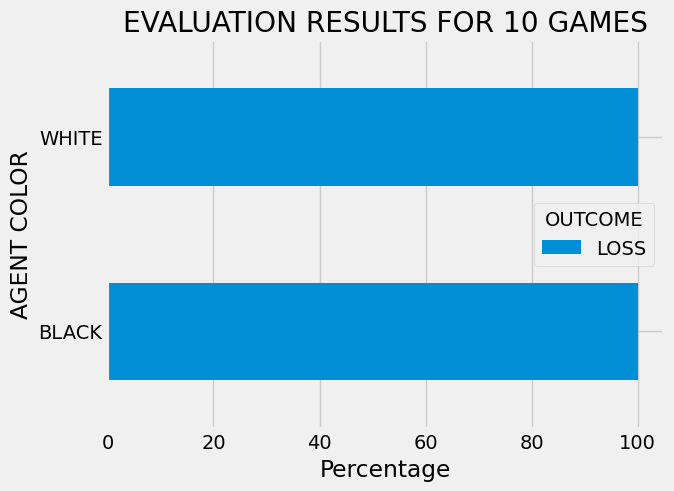

In [415]:
df = AGENT_EVALUATION(Stockfish_path, WHITE_PLAYER_POLICY, BLACK_PLAYER_POLICY, n_evaluations=5) #changed

In [12]:
df.head(5)

,AGENT COLOR,OUTCOME,N STEPS
0,WHITE,LOSS,28
1,BLACK,LOSS,7
2,WHITE,LOSS,11
3,BLACK,LOSS,27
4,WHITE,LOSS,19


# Ready to Play Chess?

In [14]:
def preprocess_state(state):
    state_boards= np.c_[state[:,:,:14], state[:,:,-7:]] #the state we want just has the current board and the last matrices with information
    return np.array([state_boards.reshape(8,8,21)])

In [15]:
# Set the seed for NumPy
np.random.seed(42)

# Set the seed for TensorFlow
tf.random.set_seed(42)

#set seed for random
random.seed(42)

Define the Deep Q-Network (DQN) model architecture using a neural network framework like TensorFlow. The model takes the state as input and outputs Q-values for each action.

In [16]:
class DQN:
    def __init__(self, state_size, env):
        #define environment
        self.env= env

        #define the state size
        self.state_size = state_size
        
        #define the action size
        self.action_size = len(env.legal_actions)
        
        #define the replay buffer
        self.replay_buffer = deque(maxlen=1000)
        
        #define the discount factor
        self.gamma = 0.9
        
        #define the epsilon value
        self.epsilon = 0.99
        
        #define the update rate at which we want to update the target network
        self.update_rate = 5
        
        #define the main network
        self.main_network = self.build_network()
        
        #define the target network
        self.target_network = self.build_network()
        
        #copy the weights of the main network to the target network
        self.target_network.set_weights(self.main_network.get_weights())

        #learning rate
        self.learning_rate = .0001
        

    #Let's define a function called build_network which is essentially our DQN. 

    def build_network(self):
        model = Sequential()
        model.add(Conv2D(filters=6, kernel_size=(7, 7), strides=1, activation='relu', padding='same', input_shape=self.state_size))
        model.add(Conv2D(filters=6, kernel_size=(3, 3), strides=2, activation='relu', padding='same'))
        model.add(Conv2D(filters=12, kernel_size=(3, 3), strides=1, activation='relu', padding='same'))
        model.add(Conv2D(filters=12, kernel_size=(3, 3), strides=2, activation='relu', padding='same'))
        model.add(Flatten())
        model.add(Dense(216, activation='relu'))
        model.add(Dense(self.env.action_space.n, activation=None))

        model.compile(loss='mse', optimizer=Adam(learning_rate=.0001, epsilon=1e-7))


        return model

    #We learned that we train DQN by randomly sampling a minibatch of transitions from the
    #replay buffer. So, we define a function called store_transition which stores the transition information
    #into the replay buffer

    def store_transition(self, state, action, reward, next_state, done):
        self.replay_buffer.append((state, action, reward, next_state, done))
        

    #We learned that in DQN, to take care of exploration-exploitation trade off, we select action
    #using the epsilon-greedy policy. So, now we define the function called epsilon_greedy
    #for selecting action using the epsilon-greedy policy.
    def epsilon_greedy(self, state):
        if random.uniform(0,1) < self.epsilon:
            legal_actions = self.env.legal_actions
            action = np.random.choice(legal_actions)
            return action
        else:    
            Q_values = self.main_network.predict(state, verbose=0)[0]
            legal_q_values= Q_values[self.env.legal_actions]
            action= self.env.legal_actions[np.argmax(legal_q_values)]
            return action
    
    #train the network
    def train(self, batch_size):
        
        minibatch = np.array(random.sample(self.replay_buffer, batch_size), dtype=object)

        state_list = np.array(minibatch[:,0], dtype=object)
        state_list = np.hstack(state_list).reshape(batch_size, 8, 8, 21)

        next_state_list = np.array(minibatch[:,3])
        next_state_list = np.hstack(next_state_list).reshape(batch_size, 8, 8, 21)

        current_Q_values_list = self.main_network.predict(state_list, verbose=0)

        max_q = np.amax(self.target_network.predict(next_state_list, verbose=0), axis=1)

        for i, zip_ in enumerate(minibatch):

            state, action, reward, next_state, done = zip_

            if not done:
                target  = reward + self.gamma * max_q[i]
            else:
                target = reward

            updated_Q_value = target # (1 - self.learning_rate)*current_Q_values_list[i][action] + self.learning_rate*(target) # - current_Q_values_list[i][action]) # This is a different form of Q-learning (Min Q-Learning)

            current_Q_values_list[i][action] = updated_Q_value
        #train the main network
        self.main_network.fit(state_list, current_Q_values_list, epochs=1, verbose=0)
            
    #update the target network weights by copying from the main network
    def update_target_network(self):
        self.target_network.set_weights(self.main_network.get_weights())
        

## Train Network

In [17]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam

In [24]:
def generate_WHITE_scenario(Stockfish_path, dqn_white, evaluation_number):
    env = gym.make("ChessAlphaZero-v0") # We will use Alpha Zero's numenclature for the actions encodings
    stockfish = Stockfish(Stockfish_path)
    stockfish.set_elo_rating(
        100
    )  # Default "skill" level is 1350, higher will increase the skill of stockfish "player". See more at https://en.wikipedia.org/wiki/Elo_rating_system
    
    #pre-process state
    dqn_white.state = env.reset()
    dqn_white.env= env
    dqn_white.state = preprocess_state(dqn_white.state)
    done = False
    counter = 0  # Since each step represents a play in a chess game we are going to store the number of steps associated to the episode/game
    # set return to 0
    Return = 0 
    Real_Return = 0

    while not done:
        if (
            counter % 2 == 0
        ):  # If the step number is even, this means that it is the WHITE player's turn
            #Update target model if the correct nº episodes has passed
            if evaluation_number % dqn_white.update_rate == 0:
                dqn_white.update_target_network()

            # Select action to perform   
            action = dqn_white.epsilon_greedy(dqn_white.state)
            #print(action)
            decoded_action = str(env.decode(action))
            stockfish.make_moves_from_current_position([decoded_action])

            # Perform selected action
            next_state, reward, done, info = env.step(action)
            real_reward= reward
            #pre-process next state
            next_state = preprocess_state(next_state)

            #if player removed piece from opponent, increase reward
            if next_state[:, :,:, :6].sum() < dqn_white.state[:, :,:, :6].sum(): 
                reward += 0.01
            
            #update values in dqn class
            dqn_white.env= env

            #store the transition information
            dqn_white.store_transition(dqn_white.state, action, reward, next_state, done)

            #update current state to next state
            dqn_white.state = next_state

            #update the return
            Return += reward
            Real_Return += real_reward

        else:  # If the step number is not even, aka odd, this means that it is the BLACK player's turn
            decoded_action = stockfish.get_best_move()
            action = env.encode(chess.Move.from_uci(decoded_action))
            stockfish.make_moves_from_current_position([decoded_action])
            next_state, reward, done, info = env.step(action)

            #pre-process next state
            next_state = preprocess_state(next_state)

            #update values in dqn class
            dqn_white.env= env
        
            #store the transition information
            dqn_white.store_transition(dqn_white.state, action, reward, next_state, done)
            
            #update current state to next state
            dqn_white.state = next_state

        counter += 1

    #if nº transitions in replay_buffer>batch_size
    if (len(dqn_white.replay_buffer) > batch_size) & (counter % 10 == 0): # Only train each 10 steps that the agent plays
        dqn_white.train(batch_size)

    env.close()
    print('Episode: ',evaluation_number, ', Return:', round(Return), 'Steps:', counter, 'Epsilon:', round(dqn_white.epsilon,2))
    return reward, np.ceil(counter / 2), dqn_white.state


def generate_BLACK_scenario(Stockfish_path, dqn_black, evaluation_number):
    env = gym.make("ChessAlphaZero-v0") # We will use Alpha Zero's numenclature for the actions encodings
    stockfish = Stockfish(Stockfish_path)
    stockfish.set_elo_rating(
        100
    )  # Default "skill" level is 1350, higher will increase the skill of stockfish "player". See more at https://en.wikipedia.org/wiki/Elo_rating_system
    
    #pre-process state
    dqn_black.state = env.reset()
    dqn_black.env= env
    dqn_black.state = preprocess_state(dqn_black.state)
    done = False
    counter = 0  # Since each step represents a play in a chess game we are going to store the number of steps associated to the episode/game
    # set return to 0
    Return = 0 
    Real_Return = 0

    while not done:
        if (
            counter % 2 == 1
        ):  # If the step number is even, this means that it is the WHITE player's turn
            
            #Update target model if the correct nº episodes has passed
            if evaluation_number % dqn_black.update_rate == 0:
                dqn_black.update_target_network()

            # Select action to perform   
            action = dqn_black.epsilon_greedy(dqn_black.state)
            decoded_action = str(env.decode(action))
            stockfish.make_moves_from_current_position([decoded_action])

            # Perform selected action
            next_state, reward, done, info = env.step(action)
            real_reward= reward

            #pre-process next state
            next_state = preprocess_state(next_state)
            
            #if player removed piece from opponent, increase reward
            if next_state[:, :,:, 6:13].sum() < dqn_black.state[:, :,:, :6].sum(): 
                reward -= 0.01

            #update values in dqn class
            dqn_black.env= env

            #store the transition information
            dqn_black.store_transition(dqn_black.state, action, -reward, next_state, done)

            #update current state to next state
            dqn_black.state = next_state

            #update the return
            Return += reward
            Real_Return += real_reward


        else:  # If the step number is not even, aka odd, this means that it is the BLACK player's turn
            decoded_action = stockfish.get_best_move()
            action = env.encode(chess.Move.from_uci(decoded_action))
            stockfish.make_moves_from_current_position([decoded_action])
            next_state, reward, done, info = env.step(action)

            #pre-process next state
            next_state = preprocess_state(next_state)

            #update values in dqn class
            dqn_black.env= env

            #store the transition information
            dqn_black.store_transition(dqn_black.state, action, reward, next_state, done)

            #update current state to next state
            dqn_black.state = next_state
        
        counter += 1
        
    #if nº transitions in replay_buffer>batch_size
    if (len(dqn_black.replay_buffer) > batch_size) & (counter % 10 == 0): # Only train each 10 steps that the agent plays
        dqn_black.train(batch_size)

    

    env.close()
    print('Episode: ',evaluation_number, ', Return:', round(Return), 'Steps:', counter, 'Epsilon:', round(dqn_black.epsilon,2))
    return reward, np.ceil(counter / 2), dqn_black.state

In [25]:
white_pieces={0: "pawn", 1: "horse", 2: "knight", 3: "rook", 4: "queen", 5: "king"} #PARA TODOS
black_pieces={6: "pawn", 7: "horse", 8: "knight", 9: "rook", 10: "queen", 11: "king"} #PARA TODOS

In [26]:
def AGENT_EVALUATION(Stockfish_path, n_evaluations=100): #changed
    results_list = []
    env= gym.make("ChessAlphaZero-v0")
    env.reset()
    dqn_white= DQN((8, 8, 21), env)
    dqn_black= DQN((8, 8, 21), env)
    for evaluation_number in tqdm(range(n_evaluations)):
        #print('in white scenario')
        generate_episode = generate_WHITE_scenario
        reward, n_steps, last_state = generate_episode(Stockfish_path, dqn_white, evaluation_number) #PARA TODOS (last_state)->retornar no generate ep

        if reward == 1:
            result = "VICTORY"
        elif reward == 0:
            result = "DRAW"
        else:
            result = "LOSS"

        agent_pieces= last_state[:, :,:, 6:13].sum() #PARA TODOS: podem ter de ajustar para [:, :,:6]
        opponent_pieces= last_state[:, :,:, :6].sum() #PARA TODOS: podem ter de ajustar para [:, :,:6]
        remaining_pieces=[] #PARA TODOS
        for piece in white_pieces: #PARA TODOS
            remaining_pieces.append(last_state[:,:,:,piece].sum()) #PARA TODOS: podem ter de ajustar para [:, :,piece]
        results_list.append(["WHITE", result, n_steps, agent_pieces, opponent_pieces, n_evaluations, *remaining_pieces]) #PARA TODOS
        
        #update the epsilon
        dqn_white.epsilon -= .005 # dqn.epsilon/num_episodes
        dqn_white.epsilon = max(dqn_white.epsilon, 0.2) 

        #print('in black scenario')
        generate_episode = generate_BLACK_scenario

        reward, n_steps, last_state = generate_episode(Stockfish_path, dqn_black, evaluation_number) #PARA TODOS (last_state)->retornar no generate ep

        if reward == -1:
            result = "VICTORY"
        elif reward == 0:
            result = "DRAW"
        else:
            result = "LOSS"

        agent_pieces= last_state[:,:,:, :6].sum() #PARA TODOS: podem ter de ajustar para [:, :,:6]
        opponent_pieces= last_state[:, :,:, 6:13].sum() #PARA TODOS: podem ter de ajustar para [:, :,:6]
        remaining_pieces=[] #PARA TODOS
        for piece in black_pieces: #PARA TODOS
            remaining_pieces.append(last_state[:,:,:,piece].sum()) #PARA TODOS: podem ter de ajustar para [:, :,piece]
        results_list.append(["BLACK", result, n_steps, agent_pieces, opponent_pieces, n_evaluations, *remaining_pieces]) #PARA TODOS

        #update the epsilon
        dqn_black.epsilon -= .005 # dqn.epsilon/num_episodes
        dqn_black.epsilon = max(dqn_black.epsilon, 0.2) 
        

    df = pd.DataFrame(
        results_list, columns=["AGENT COLOR", "OUTCOME", "N STEPS", "AGENT PIECES", "OPPONENT PIECES", "EPISODE","pawn", "horse", "knight", "rook", "queen", "king"]
    ).astype("int", errors="ignore")

    plt.style.use("fivethirtyeight")

    results_group = (
        df.groupby(["AGENT COLOR", "OUTCOME"])
        .count()
        .rename(columns={"N STEPS": "GAMES"})
    )

    n_games = results_group.sum()[0]

    results_group = (2 * 100 * results_group / (n_games)).astype("int")

    viz_df = (
        results_group.reset_index()
        .pivot_table(index="AGENT COLOR", columns="OUTCOME", values="GAMES")
        .fillna(0)
    )

    viz_df.plot(kind="barh", stacked=True)

    plt.xlabel("Percentage")
    plt.title(f"EVALUATION RESULTS FOR {n_games} GAMES")

    plt.show()

    return df, dqn_black, dqn_white

In [28]:
import gym
import gym_chess

  0%|          | 0/800 [00:00<?, ?it/s]

Episode:  0 , Return: 0 Steps: 6 Epsilon: 0.99
Episode:  0 , Return: 0 Steps: 21 Epsilon: 0.99
Episode:  1 , Return: 0 Steps: 52 Epsilon: 0.98
Episode:  1 , Return: 0 Steps: 9 Epsilon: 0.98
Episode:  2 , Return: 0 Steps: 44 Epsilon: 0.98
Episode:  2 , Return: 0 Steps: 35 Epsilon: 0.98
Episode:  3 , Return: 0 Steps: 6 Epsilon: 0.97
Episode:  3 , Return: 0 Steps: 47 Epsilon: 0.97
Episode:  4 , Return: 0 Steps: 32 Epsilon: 0.97
Episode:  4 , Return: 0 Steps: 21 Epsilon: 0.97
Episode:  5 , Return: 0 Steps: 28 Epsilon: 0.96
Episode:  5 , Return: 0 Steps: 31 Epsilon: 0.96
Episode:  6 , Return: 0 Steps: 42 Epsilon: 0.96
Episode:  6 , Return: 0 Steps: 37 Epsilon: 0.96
Episode:  7 , Return: 0 Steps: 58 Epsilon: 0.95
Episode:  7 , Return: 0 Steps: 21 Epsilon: 0.95
Episode:  8 , Return: 0 Steps: 34 Epsilon: 0.95
Episode:  8 , Return: 0 Steps: 57 Epsilon: 0.95
Episode:  9 , Return: 0 Steps: 42 Epsilon: 0.94
Episode:  9 , Return: 0 Steps: 39 Epsilon: 0.94
Episode:  10 , Return: 0 Steps: 44 Epsilon:

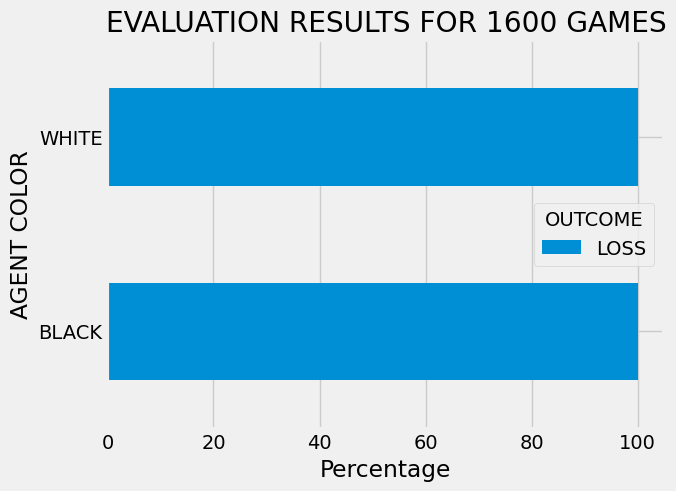

In [29]:
#number of episodes
num_episodes = 800

# Define the batch size:
batch_size = 128

df_deep_q, dqn_black, dqn_white = AGENT_EVALUATION(Stockfish_path, n_evaluations=num_episodes) 

In [30]:
df_deep_q.to_csv("./evaluation_data/deepqlearning_normal.csv")
df_deep_q.head(5)

,AGENT COLOR,OUTCOME,N STEPS,AGENT PIECES,OPPONENT PIECES,EPISODE,pawn,horse,knight,rook,queen,king
0,WHITE,LOSS,3,16,16,800,8,2,2,2,1,1
1,BLACK,LOSS,11,10,15,800,7,2,2,2,1,1
2,WHITE,LOSS,26,14,6,800,3,1,0,1,0,1
3,BLACK,LOSS,5,15,16,800,8,2,2,2,1,1
4,WHITE,LOSS,22,16,8,800,5,0,1,1,0,1


In [31]:
dqn_white.target_network.save('MODELS/target_chess_white.keras')
dqn_white.main_network.save('MODELS/main_chess_white.keras')
dqn_black.target_network.save('MODELS/target_chess_black.keras')
dqn_black.main_network.save('MODELS/main_chess_black.keras')

## Pre-made games

In [14]:
import chess.pgn
import io

pgn = open("C:/Users/isabe/Desktop/RL/Project/alphazero_stockfish_all/alphazero_vs_stockfish_all.pgn")

train_df=[]

for i in range(110):
    game=chess.pgn.read_game(pgn)
    # Process the moves, positions in board, rewards and outcome in the game
    moves = []
    positions = []
    rewards = []
    outcome = game.headers["Result"]
    if game.headers["White"]== "AlphaZero":
        color= "white"
    else:
        color= "black"

    board = game.board()
    for move in game.mainline_moves():
        board.push(move)
        moves.append(move)
        positions.append(board.fen())  # Save board position
        
    game_data = {
        "moves": moves,
        "positions": positions,
        "player_color": color,
        "outcome": outcome
    }

    train_df.append(game_data)



In [15]:
train_df = pd.DataFrame(train_df)
train_df.head()

,moves,positions,player_color,outcome
0,"[g1f3, g8f6, c2c4, e7e6, b1c3, f8b4, d1c2, e8g...",[rnbqkbnr/pppppppp/8/8/8/5N2/PPPPPPPP/RNBQKB1R...,white,1-0
1,"[d2d4, g8f6, c2c4, e7e6, g1f3, b7b6, g2g3, c8b...",[rnbqkbnr/pppppppp/8/8/3P4/8/PPP1PPPP/RNBQKBNR...,white,1-0
2,"[d2d4, g8f6, c2c4, e7e6, g1f3, b7b6, g2g3, c8b...",[rnbqkbnr/pppppppp/8/8/3P4/8/PPP1PPPP/RNBQKBNR...,white,1-0
3,"[g1f3, e7e6, c2c4, g8f6, b1c3, f8b4, d1c2, e8g...",[rnbqkbnr/pppppppp/8/8/8/5N2/PPPPPPPP/RNBQKB1R...,white,1-0
4,"[d2d4, g8f6, g1f3, e7e6, c2c4, b7b6, g2g3, c8b...",[rnbqkbnr/pppppppp/8/8/3P4/8/PPP1PPPP/RNBQKBNR...,white,1-0


In [16]:
white_pieces={0: "pawn", 1: "horse", 2: "knight", 3: "rook", 4: "queen", 5: "king"} #PARA TODOS
black_pieces={6: "pawn", 7: "horse", 8: "knight", 9: "rook", 10: "queen", 11: "king"} #PARA TODOS

In [17]:
def WHITE_PLAYER_POLICY(env, state, step, episode):
    encoded_move = env.encode(train_df.iloc[episode]['moves'][step])
    return encoded_move


def BLACK_PLAYER_POLICY(env, state, step, episode):
    encoded_move = env.encode(train_df.iloc[episode]['moves'][step])
    return encoded_move

In [18]:
def preprocess_state(state):
    state_boards= np.c_[state[:,:,:14], state[:,:,-7:]] #the state we want just has the current board and the last matrices with information
    return np.array([state_boards.reshape(8,8,21)])

In [19]:
class DQN:
    def __init__(self, state_size, env):
        #define environment
        self.env= env

        #define the state size
        self.state_size = state_size
        
        #define the action size
        self.action_size = len(env.legal_actions)
        
        #define the replay buffer
        self.replay_buffer = deque(maxlen=1000)
        
        #define the discount factor
        self.gamma = 0.9
        
        #define the epsilon value
        self.epsilon = 0.99
        
        #define the update rate at which we want to update the target network
        self.update_rate = 5
        
        #define the main network
        self.main_network = self.build_network()
        
        #define the target network
        self.target_network = self.build_network()
        
        #copy the weights of the main network to the target network
        self.target_network.set_weights(self.main_network.get_weights())

        #learning rate
        self.learning_rate = .0001
        

    #Let's define a function called build_network which is essentially our DQN. 

    def build_network(self):
        model = Sequential()
        model.add(Conv2D(filters=6, kernel_size=(7, 7), strides=1, activation='relu', padding='same', input_shape=self.state_size))
        model.add(Conv2D(filters=6, kernel_size=(3, 3), strides=2, activation='relu', padding='same'))
        model.add(Conv2D(filters=12, kernel_size=(3, 3), strides=1, activation='relu', padding='same'))
        model.add(Conv2D(filters=12, kernel_size=(3, 3), strides=2, activation='relu', padding='same'))
        model.add(Flatten())
        model.add(Dense(216, activation='relu'))
        model.add(Dense(self.env.action_space.n, activation=None))

        model.compile(loss='mse', optimizer=Adam(learning_rate=.0001, epsilon=1e-7))


        return model

    #We learned that we train DQN by randomly sampling a minibatch of transitions from the
    #replay buffer. So, we define a function called store_transition which stores the transition information
    #into the replay buffer

    def store_transition(self, state, action, reward, next_state, done):
        self.replay_buffer.append((state, action, reward, next_state, done))
        

    #We learned that in DQN, to take care of exploration-exploitation trade off, we select action
    #using the epsilon-greedy policy. So, now we define the function called epsilon_greedy
    #for selecting action using the epsilon-greedy policy.
    def epsilon_greedy(self, state):
        if random.uniform(0,1) < self.epsilon:
            legal_actions = self.env.legal_actions
            action = np.random.choice(legal_actions)
            return action
        else:    
            Q_values = self.main_network.predict(state, verbose=0)[0]
            legal_q_values= Q_values[self.env.legal_actions]
            action= self.env.legal_actions[np.argmax(legal_q_values)]
            return action
    
    #train the network
    def train(self, batch_size):
        
        minibatch = np.array(random.sample(self.replay_buffer, batch_size), dtype=object)

        state_list = np.array(minibatch[:,0], dtype=object)
        state_list = np.hstack(state_list).reshape(batch_size, 8, 8, 21)

        next_state_list = np.array(minibatch[:,3])
        next_state_list = np.hstack(next_state_list).reshape(batch_size, 8, 8, 21)

        current_Q_values_list = self.main_network.predict(state_list, verbose=0)

        max_q = np.amax(self.target_network.predict(next_state_list, verbose=0), axis=1)

        for i, zip_ in enumerate(minibatch):

            state, action, reward, next_state, done = zip_

            if not done:
                target  = reward + self.gamma * max_q[i]
            else:
                target = reward

            updated_Q_value = target # (1 - self.learning_rate)*current_Q_values_list[i][action] + self.learning_rate*(target) # - current_Q_values_list[i][action]) # This is a different form of Q-learning (Min Q-Learning)

            current_Q_values_list[i][action] = updated_Q_value
        #train the main network
        self.main_network.fit(state_list, current_Q_values_list, epochs=1, verbose=0)
            
    #update the target network weights by copying from the main network
    def update_target_network(self):
        self.target_network.set_weights(self.main_network.get_weights())

In [20]:
def generate_WHITE_scenario(Stockfish_path, dqn_white, evaluation_number):
    env = gym.make("ChessAlphaZero-v0") # We will use Alpha Zero's numenclature for the actions encodings
    stockfish = Stockfish(Stockfish_path)
    stockfish.set_elo_rating(
        100
    )  # Default "skill" level is 1350, higher will increase the skill of stockfish "player". See more at https://en.wikipedia.org/wiki/Elo_rating_system
    
    #pre-process state
    dqn_white.state = env.reset()
    dqn_white.env= env
    dqn_white.state = preprocess_state(dqn_white.state)
    done = False
    counter = 0  # Since each step represents a play in a chess game we are going to store the number of steps associated to the episode/game
    # set return to 0
    Return = 0 
    Real_Return = 0

    while not done:
        if (
            counter % 2 == 0
        ):  # If the step number is even, this means that it is the WHITE player's turn
            #Update target model if the correct nº episodes has passed
            if evaluation_number % dqn_white.update_rate == 0:
                dqn_white.update_target_network()

            # Select action to perform   
            action = dqn_white.epsilon_greedy(dqn_white.state)
            #print(action)
            decoded_action = str(env.decode(action))
            stockfish.make_moves_from_current_position([decoded_action])

            # Perform selected action
            next_state, reward, done, info = dqn_white.env.step(action)
            real_reward= reward
            #pre-process next state
            next_state = preprocess_state(next_state)

            #if player removed piece from opponent, increase reward (by very small ammount)
            if next_state[:, :,:, :6].sum() < dqn_white.state[:, :,:, :6].sum(): 
                reward += 0.01
            
            #update values in dqn class
            dqn_white.env= env

            #store the transition information
            dqn_white.store_transition(dqn_white.state, action, reward, next_state, done)

            #update current state to next state
            dqn_white.state = next_state

            #update the return
            Return += reward
            Real_Return += real_reward


        else:  # If the step number is not even, aka odd, this means that it is the BLACK player's turn
            decoded_action = stockfish.get_best_move()
            action = env.encode(chess.Move.from_uci(decoded_action))
            stockfish.make_moves_from_current_position([decoded_action])
            next_state, reward, done, info = env.step(action)

            #pre-process next state
            next_state = preprocess_state(next_state)

            #update values in dqn class
            dqn_white.env= env

            #store the transition information
            dqn_white.store_transition(dqn_white.state, action, reward, next_state, done)
            
            #update current state to next state
            dqn_white.state = next_state


        #if nº transitions in replay_buffer>batch_size
            if (len(dqn_white.replay_buffer) > batch_size) & (counter % 10 == 0): # Only train each 10 steps that the agent plays
                dqn_white.train(batch_size)

        counter += 1
        
    env.close()
    print('Episode: ',evaluation_number, ', Return:', round(reward), 'Steps:', counter, 'Epsilon:', round(dqn_white.epsilon,2))
    return reward, np.ceil(counter / 2), dqn_white.state


def generate_BLACK_scenario(Stockfish_path, dqn_black, evaluation_number):
    env = gym.make("ChessAlphaZero-v0") # We will use Alpha Zero's numenclature for the actions encodings
    stockfish = Stockfish(Stockfish_path)
    stockfish.set_elo_rating(
        100
    )  # Default "skill" level is 1350, higher will increase the skill of stockfish "player". See more at https://en.wikipedia.org/wiki/Elo_rating_system
    
    #pre-process state
    dqn_black.state = env.reset()
    dqn_black.env= env
    dqn_black.state = preprocess_state(dqn_black.state)
    done = False
    counter = 0  # Since each step represents a play in a chess game we are going to store the number of steps associated to the episode/game
    # set return to 0
    Return = 0 
    Real_Return = 0

    while not done:
        if (
            counter % 2 == 1
        ):  # If the step number is even, this means that it is the WHITE player's turn
            
            #Update target model if the correct nº episodes has passed
            if evaluation_number % dqn_black.update_rate == 0:
                dqn_black.update_target_network()

            # Select action to perform   
            action = dqn_black.epsilon_greedy(dqn_black.state)
            decoded_action = str(env.decode(action))
            stockfish.make_moves_from_current_position([decoded_action])

            # Perform selected action
            next_state, reward, done, info = dqn_black.env.step(action)
            real_reward= reward

            #pre-process next state
            next_state = preprocess_state(next_state)
            
            #if player removed piece from opponent, increase reward
            if next_state[:, :,:, 6:13].sum() < dqn_black.state[:, :,:, :6].sum(): 
                reward -= 0.01

            #update values in dqn class
            dqn_black.env= env

            #store the transition information
            #reward negative because -1 is black win
            dqn_black.store_transition(dqn_black.state, action, -reward, next_state, done)

            #update current state to next state
            dqn_black.state = next_state

            #update the return
            Return += reward
            Real_Return += real_reward


        else:  # If the step number is not even, aka odd, this means that it is the BLACK player's turn
            decoded_action = stockfish.get_best_move()
            action = env.encode(chess.Move.from_uci(decoded_action))
            stockfish.make_moves_from_current_position([decoded_action])
            next_state, reward, done, info = env.step(action)

            #pre-process next state
            next_state = preprocess_state(next_state)

            #update values in dqn class
            dqn_black.env= env
        
            #store the transition information
            dqn_black.store_transition(dqn_black.state, action, -reward, next_state, done)
            
            #update current state to next state
            dqn_black.state = next_state
            

        #if nº transitions in replay_buffer>batch_size
        if (len(dqn_black.replay_buffer) > batch_size) & (counter % 10 == 0): # Only train each 10 steps that the agent plays
            dqn_black.train(batch_size)

        counter += 1

    env.close()
    print('Episode: ',evaluation_number, ', Return:', round(reward), 'Steps:', counter, 'Epsilon:', round(dqn_black.epsilon,2))
    return reward, np.ceil(counter / 2), dqn_black.state

In [21]:
def AGENT_EVALUATION(Stockfish_path, n_evaluations=100): #changed
    results_list = []
    env= gym.make("ChessAlphaZero-v0")
    env.reset()
    dqn_white= DQN((8, 8, 21), env)
    dqn_black= DQN((8, 8, 21), env)
    for game in range(len(train_df)):
        env = gym.make(
            "ChessAlphaZero-v0"
        )  # We will use Alpha Zero's numenclature for the actions encodings
        dqn_white.state = env.reset()
        dqn_white.env= env
        dqn_white.state = preprocess_state(dqn_white.state)

        dqn_black.state = env.reset()
        dqn_black.env= env
        dqn_black.state = preprocess_state(dqn_black.state)
        state = env.reset()
        done = False
        counter = 0  # Since each step represents a play in a chess game we are going to store the number of steps associated to the episode/game
        while not done:
            if (
                counter % 2 == 0
            ):  # If the step number is even, this means that it is the WHITE player's turn
                
                action = WHITE_PLAYER_POLICY(env, state, counter, game)

                #perform action
                next_state, reward, done, info = dqn_white.env.step(action)

                if counter == len(train_df.iloc[game]['moves'])-1: #last move of the game
                    done= True
                    if train_df.iloc[game]['outcome']== "1-0":
                        reward= 1
                    elif train_df.iloc[game]['outcome']== "1/2-1/2":
                        reward= 0
                    else:
                        reward= -1
                
                #save state in the right format
                next_state = preprocess_state(next_state)

                #store the transition information
                dqn_white.store_transition(dqn_white.state, action, reward, next_state, done)

                #update current state to next state
                dqn_white.state = next_state

            else:  # If the step number is not even, aka odd, this means that it is the BLACK player's turn
                action = BLACK_PLAYER_POLICY(env, state, counter, game)

                #perform action
                next_state, reward, done, info = dqn_black.env.step(action)

                if counter == len(train_df.iloc[game]['moves'])-1: #last move of the game
                    done= True
                    if train_df.iloc[game]['outcome']== "0-1":
                        reward= 1
                    elif train_df.iloc[game]['outcome']== "1/2-1/2":
                        reward= 0
                    else:
                        reward = -1
                
                #save state in the right format
                next_state = preprocess_state(next_state)

                #store the transition information
                dqn_black.store_transition(dqn_black.state, action, -reward, next_state, done)

                #update current state to next state
                dqn_black.state = next_state

            counter += 1

        dqn_white.env.close()   
        dqn_black.env.close()          


    for evaluation_number in tqdm(range(n_evaluations)): #PARA TODOS
        #print('in white scenario')
        generate_episode = generate_WHITE_scenario
        reward, n_steps, last_state = generate_episode(Stockfish_path, dqn_white, evaluation_number) #PARA TODOS (last_state)->retornar no generate ep

        if reward == 1:
            result = "VICTORY"
        elif reward == 0:
            result = "DRAW"
        else:
            result = "LOSS"

        agent_pieces= last_state[:, :,:, 6:13].sum() #PARA TODOS: podem ter de ajustar para [:, :,:6]
        opponent_pieces= last_state[:, :,:, :6].sum() #PARA TODOS: podem ter de ajustar para [:, :,:6]
        remaining_pieces=[] #PARA TODOS
        for piece in white_pieces: #PARA TODOS
            remaining_pieces.append(last_state[:,:,:,piece].sum()) #PARA TODOS: podem ter de ajustar para [:, :,piece]
        results_list.append(["WHITE", result, n_steps, agent_pieces, opponent_pieces, evaluation_number, *remaining_pieces]) #PARA TODOS
        
        #update the epsilon
        dqn_white.epsilon -= .005 # dqn.epsilon/num_episodes
        dqn_white.epsilon = max(dqn_white.epsilon, 0.2) 

        #print('in black scenario')
        generate_episode = generate_BLACK_scenario

        reward, n_steps, last_state = generate_episode(Stockfish_path, dqn_black, evaluation_number) #PARA TODOS (last_state)->retornar no generate ep

        if reward == -1:
            result = "VICTORY"
        elif reward == 0:
            result = "DRAW"
        else:
            result = "LOSS"

        agent_pieces= last_state[:,:,:, :6].sum() #PARA TODOS: podem ter de ajustar para [:, :,:6]
        opponent_pieces= last_state[:, :,:, 6:13].sum() #PARA TODOS: podem ter de ajustar para [:, :,:6]
        remaining_pieces=[] #PARA TODOS
        for piece in black_pieces: #PARA TODOS
            remaining_pieces.append(last_state[:,:,:,piece].sum()) #PARA TODOS: podem ter de ajustar para [:, :,piece]
        results_list.append(["BLACK", result, n_steps, agent_pieces, opponent_pieces, evaluation_number, *remaining_pieces]) #PARA TODOS

        #update the epsilon
        dqn_black.epsilon -= .005 # dqn.epsilon/num_episodes
        dqn_black.epsilon = max(dqn_black.epsilon, 0.2) 
        

    df = pd.DataFrame(
        results_list, columns=["AGENT COLOR", "OUTCOME", "N STEPS", "AGENT PIECES", "OPPONENT PIECES", "EPISODE", "pawn", "horse", "knight", "rook", "queen", "king"]  #PARA TODOS
    ).astype("int", errors="ignore")

    plt.style.use("fivethirtyeight")

    results_group = (
        df.groupby(["AGENT COLOR", "OUTCOME"])
        .count()
        .rename(columns={"N STEPS": "GAMES"})
    )

    n_games = results_group.sum()[0]

    results_group = (2 * 100 * results_group / (n_games)).astype("int")

    viz_df = (
        results_group.reset_index()
        .pivot_table(index="AGENT COLOR", columns="OUTCOME", values="GAMES")
        .fillna(0)
    )

    viz_df.plot(kind="barh", stacked=True)

    plt.xlabel("Percentage")
    plt.title(f"EVALUATION RESULTS FOR {n_games} GAMES")

    plt.show()

    return df, dqn_black, dqn_white

  0%|          | 0/800 [00:00<?, ?it/s]

Episode:  0 , Return: -1 Steps: 26 Epsilon: 0.99
Episode:  0 , Return: 1 Steps: 45 Epsilon: 0.99
Episode:  1 , Return: -1 Steps: 42 Epsilon: 0.98
Episode:  1 , Return: 1 Steps: 59 Epsilon: 0.98
Episode:  2 , Return: -1 Steps: 36 Epsilon: 0.98
Episode:  2 , Return: 1 Steps: 57 Epsilon: 0.98
Episode:  3 , Return: -1 Steps: 50 Epsilon: 0.97
Episode:  3 , Return: 1 Steps: 43 Epsilon: 0.97
Episode:  4 , Return: -1 Steps: 32 Epsilon: 0.97
Episode:  4 , Return: 1 Steps: 61 Epsilon: 0.97
Episode:  5 , Return: -1 Steps: 30 Epsilon: 0.96
Episode:  5 , Return: 1 Steps: 31 Epsilon: 0.96
Episode:  6 , Return: -1 Steps: 40 Epsilon: 0.96
Episode:  6 , Return: 1 Steps: 55 Epsilon: 0.96
Episode:  7 , Return: -1 Steps: 26 Epsilon: 0.95
Episode:  7 , Return: 1 Steps: 33 Epsilon: 0.95
Episode:  8 , Return: -1 Steps: 56 Epsilon: 0.95
Episode:  8 , Return: 1 Steps: 29 Epsilon: 0.95
Episode:  9 , Return: -1 Steps: 38 Epsilon: 0.94
Episode:  9 , Return: 1 Steps: 25 Epsilon: 0.94
Episode:  10 , Return: -1 Step

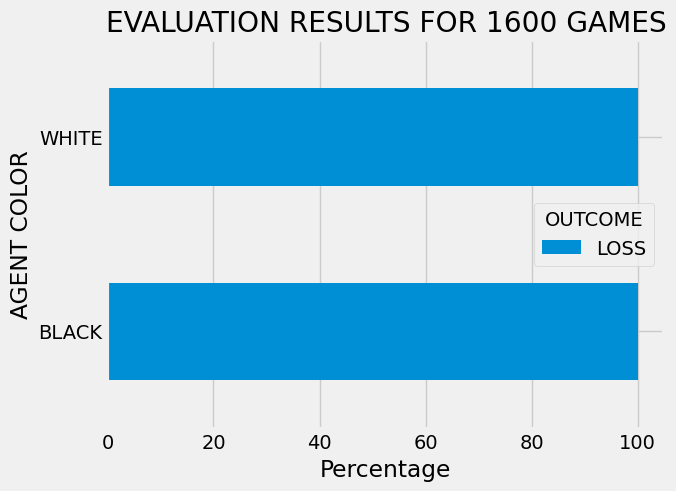

In [22]:
#number of episodes
num_episodes = 800

# Define the batch size:
batch_size = 128

df, dqn_black, dqn_white = AGENT_EVALUATION(Stockfish_path, n_evaluations=num_episodes) 

In [25]:
df.to_csv("./evaluation_data/deepqlearning_imitation.csv")
df.head(5)

,AGENT COLOR,OUTCOME,N STEPS,AGENT PIECES,OPPONENT PIECES,EPISODE,pawn,horse,knight,rook,queen,king
0,WHITE,LOSS,13,16,8,0,4,0,1,2,0,1
1,BLACK,LOSS,23,9,15,0,7,2,2,2,1,1
2,WHITE,LOSS,21,16,5,1,2,1,0,1,0,1
3,BLACK,LOSS,30,9,16,1,8,2,2,2,1,1
4,WHITE,LOSS,18,16,9,2,5,1,1,1,0,1


In [27]:
dqn_white.target_network.save('MODELS/target_chess_white_pretrained.keras')
dqn_white.main_network.save('MODELS/main_chess_white_pretrained.keras')
dqn_black.target_network.save('MODELS/target_chess_black_pretrained.keras')
dqn_black.main_network.save('MODELS/main_chess_black_pretrained.keras')

In [ ]:
df.to_csv("/Users/nekas/Downloads/RL/project/evaluation_df/deepqlearning_ines_test.csv")
df.head(5)

## Evaluation and Results

### Evaluation functions

In [6]:
def add_episode_column(df):
    df['EPISODE'] = np.floor(df.index/2)
    df['EPISODE'] = df['EPISODE'].astype(int)
    return df

In [66]:
def rename_columns(df):
    #We had a little type in the main function so we had to rename the columns here
    df.rename(columns={"knight": "bishop"}, inplace=True)
    df.rename(columns={"horse": "knight"}, inplace=True)
    df.head(1)

In [123]:
def separate_player_colors(df, name_white = 'df_white', name_black = 'df_black'): 
    df_white = df[df['AGENT COLOR'] == 'WHITE']
    globals()[name_white] = df_white   # Set the global variable name 
    
    df_black = df[df['AGENT COLOR'] == 'BLACK']
    globals()[name_black] = df_black
    
    return globals()[name_white], globals()[name_black]

In [28]:
def pie_chart_per_color_pieces(df_white,df_black):
    #pie chart color  (green for wins, orange for draws and red for losses)
    pie_colors = {"WIN": "g", "DRAW": "orange",  "LOSS":"r"} # dict to correspond colors to outcomes
    
    # White pices pie chart
    y_white = np.array(df_white['OUTCOME'].value_counts())

    # Black pices pie chart    
    y_black = np.array(df_black['OUTCOME'].value_counts())


    # Creation of two subplots so that we have the pie charts side by side 
    fig, axes = plt.subplots(1, 2, figsize=(10,5))

    axes[0].pie(y_white, labels=df_white['OUTCOME'].unique(), 
                colors=[pie_colors[label] for label in df_white['OUTCOME'].unique()])
    axes[0].set_title("White Pieces")
    
    axes[1].pie(y_black, labels=df_black['OUTCOME'].unique(),
                colors=[pie_colors[label] for label in df_black['OUTCOME'].unique()])        
    axes[1].set_title("Black Pieces")

    # Legend with matching colors    
    plt.legend(labels = df_white['OUTCOME'].unique(),  
               markerscale = 30,  
               loc='center',  
               bbox_to_anchor=(-0.1, 0.95),  
               prop={'size':13}) 
    
    plt.show()

In [33]:
def average_moves_per_player(df_white,df_black): 
   #Compare average number of moves per game for white and black. 
   #This can indicate how efficiently the engine is playing.
   #So we strive for 2 columns that are about the same height.

    x = np.array(["White pieces", "Black pieces"])
    y = np.array(np.mean(df_white['N STEPS']),np.mean(df_black['N STEPS']))

    plt.bar(x,y)
    plt.title("Average number of mover per player color")
    plt.show()

In [145]:
def strongest_piece_bar_plot(df): 
    x = np.array(df['Strongest_opponent_piece'].unique())
    y = np.array(df['Strongest_opponent_piece'].value_counts())

    plt.bar(x,y)
    plt.title("Strongest Piece in the end of the game count")
    plt.show()

In [42]:
def evaluation_number_of_moves(df):
    df_white, df_black = separate_colors(df)
    #Comparing the number of moves per game for white and black. 
    y1 = np.array(df_white['N STEPS'])
    y2 = np.array(df_black['N STEPS'])
    x = np.arange(1,len(df['EPISODE'].unique())+1)
    plt.plot(x,y1, label="White Pieces")
    plt.plot(x,y2, label="Black Pieces")
    plt.legend(loc="upper right")
    plt.title("Number of moves per game")
    plt.xlabel("Episode Number")
    plt.ylabel("Move Number")
    plt.show()

In [48]:
def number_of_moves_dispersion(df_color):
    # Get the number of moves for each outcome
    steps_white_win = np.array(df_color.loc[df_color['OUTCOME'] == 'WIN', 'N STEPS'])
    steps_white_loss = np.array(df_color.loc[df_color['OUTCOME'] == 'LOSS', 'N STEPS'])
    steps_white_draw = np.array(df_color.loc[df_color['OUTCOME'] == 'DRAW', 'N STEPS'])

    # Create the data for the boxplot  
    data = [steps_white_win, steps_white_draw, steps_white_loss]
    group_names = ['Wins', 'Draws', 'Losses']

    # Plot the boxplot    
    plt.boxplot(data, notch=False, labels=group_names)
    plt.title("Number of moves of  the " +str(df_color['AGENT COLOR'].unique())+" pieces per outcome")
    plt.xlabel("Outcome")  
    plt.ylabel("Number of steps")

    plt.show()

In [57]:
def average_moves_per_player_per_outcome(df_white,df_black):
  
   outcomes = ['WIN', 'LOSS', 'DRAW']
   x = np.array(['White pieces ' + o for o in outcomes] + ['Black pieces ' + o for o in outcomes])
   
   y_white = [np.mean(df_white.loc[df_white['OUTCOME']== o, 'N STEPS']) for o in outcomes]    
   y_black = [np.mean(df_black.loc[df_black['OUTCOME']== o, 'N STEPS']) for o in outcomes]
   
   y = np.array(y_white + y_black)
   
   plt.bar(x, y)   # Stacked bar plot
   plt.xticks(x, rotation=30) 
   plt.title("Average number of moves per player color and per outcome")
   plt.show()

`Opponents_points` column - this columns sums the values of the opponents pieces that were left when the game ended. This calculates the total points left by the opponent based on the piece values.

According to [chess.com](https://www.chess.com/terms/chess-piece-value) the values of each piece are:
* Pawn = 1 point
* Knight = 3 points
* Bishop = 3 points
* Rook = 5 points
* Queen = 9 points

The king is the only piece in the game that doesn't have any points associated with it.This is because the king cannot be captured (an attacked king is in check), and also because checkmating the king is the true goal of any chess game.

In [94]:
def total_point_left_of_opponents_pieces(df):
    df['opponents_points'] = 1*df['pawn']+3*df['knight']+3*df['bishop']+5*df['rook']+9*df['queen']
    return df

In [104]:
def total_opponents_pieces_left_line_plot(df):
    df_white, df_black = separate_colors(df)
    #Comparing the number of moves per game for white and black. 
    y_opp_black = np.array(df_white['OPPONENT PIECES'])
    y_opp_white = np.array(df_black['OPPONENT PIECES'])
    x = np.arange(1,len(df['EPISODE'].unique())+1)
    plt.plot(x,y_opp_black, label="Opponent has the Black Pieces")
    plt.plot(x,y_opp_white, label="Opponent has the White Pieces")
    plt.legend(loc="upper right")
    plt.title("Number of pieces left after game ended")
    plt.xlabel("Episode Number")
    plt.ylabel("Number of pieces")
    plt.show()

In [102]:
def total_opponents_points_left_line_plot(df):
    df_white, df_black = separate_colors(df)
    #Comparing the number of moves per game for white and black. 
    y_opp_black = np.array(df_white['opponents_points'])
    y_opp_white = np.array(df_black['opponents_points'])
    x = np.arange(1,len(df['EPISODE'].unique())+1)
    plt.plot(x,y_opp_black, label="Opponent has the Black Pieces")
    plt.plot(x,y_opp_white, label="Opponent has the White Pieces")
    plt.legend(loc="upper right")
    plt.title("Points of material per game")
    plt.xlabel("Episode Number")
    plt.ylabel("Total points of material")
    plt.show()

In [113]:
def pieces_left_line_plot(df):
    #Comparing the number of moves per game for white and black. 
    y_agent = np.array(df['AGENT PIECES'])
    y_opp = np.array(df['OPPONENT PIECES'])
    plt.plot(y_agent, label="Agent's Pieces")
    plt.plot(y_opp, label="Opponent's Pieces")
    plt.legend(loc="upper right")
    plt.title("Number of pieces left after game ended")
    plt.ylabel("Number of pieces")
    plt.show()

In [114]:
def get_strongest_opponent_piece(row):
# Sequence of If-statements
    if row['queen'] > 0:
        return 'queen'
    elif row['rook'] > 0:
        return 'rook'
    elif row['bishop'] > 0:
        return 'bishop'
    elif row['knight'] > 0:
        return 'knight'
    elif row['pawn'] > 0:
        return 'pawn'
    else:
        return 'king'
def strongest_piece(df):    
    #calling the previous function to be applied in all the rows
    df['Strongest_opponent_piece'] = df.apply(get_strongest_opponent_piece, axis=1)
    return df

### MCTS Evaluation

In [95]:
mcts_df = pd.read_excel('/Users/nekas/Downloads/model_rl/MCTS RESULTS.xlsx')
mcts_df.head(3)

,AGENT COLOR,OUTCOME,N STEPS,AGENT PIECES,OPPONENT PIECES,pawn,horse,knight,rook,queen,king
0,WHITE,LOSS,3,16,16,8,2,2,2,1,1
1,BLACK,LOSS,20,15,7,7,2,2,2,1,1
2,WHITE,LOSS,18,15,11,6,1,2,1,0,1


In [96]:
rename_columns(mcts_df)
mcts_df.head(1)

,AGENT COLOR,OUTCOME,N STEPS,AGENT PIECES,OPPONENT PIECES,pawn,knight,bishop,rook,queen,king
0,WHITE,LOSS,3,16,16,8,2,2,2,1,1


In [97]:
add_episode_column(mcts_df)

,AGENT COLOR,OUTCOME,N STEPS,AGENT PIECES,OPPONENT PIECES,pawn,knight,bishop,rook,queen,king,EPISODE
0,WHITE,LOSS,3,16,16,8,2,2,2,1,1,0
1,BLACK,LOSS,20,15,7,7,2,2,2,1,1,0
2,WHITE,LOSS,18,15,11,6,1,2,1,0,1,1
3,BLACK,LOSS,29,16,6,8,2,2,2,1,1,1
4,WHITE,LOSS,20,12,10,5,2,1,1,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
195,BLACK,LOSS,20,15,11,7,2,2,2,1,1,97
196,WHITE,LOSS,16,15,11,5,2,1,2,0,1,98
197,BLACK,LOSS,20,14,8,5,2,2,2,2,1,98
198,WHITE,LOSS,11,16,12,6,2,2,1,0,1,99


In [99]:
total_point_left_of_opponents_pieces(mcts_df)

,AGENT COLOR,OUTCOME,N STEPS,AGENT PIECES,OPPONENT PIECES,pawn,knight,bishop,rook,queen,king,EPISODE,opponents_points
0,WHITE,LOSS,3,16,16,8,2,2,2,1,1,0,39
1,BLACK,LOSS,20,15,7,7,2,2,2,1,1,0,38
2,WHITE,LOSS,18,15,11,6,1,2,1,0,1,1,20
3,BLACK,LOSS,29,16,6,8,2,2,2,1,1,1,39
4,WHITE,LOSS,20,12,10,5,2,1,1,0,1,2,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,BLACK,LOSS,20,15,11,7,2,2,2,1,1,97,38
196,WHITE,LOSS,16,15,11,5,2,1,2,0,1,98,24
197,BLACK,LOSS,20,14,8,5,2,2,2,2,1,98,45
198,WHITE,LOSS,11,16,12,6,2,2,1,0,1,99,23


In [115]:
strongest_piece(mcts_df)

,AGENT COLOR,OUTCOME,N STEPS,AGENT PIECES,OPPONENT PIECES,pawn,knight,bishop,rook,queen,king,EPISODE,opponents_points,Strongest_opponent_piece
0,WHITE,LOSS,3,16,16,8,2,2,2,1,1,0,39,queen
1,BLACK,LOSS,20,15,7,7,2,2,2,1,1,0,38,queen
2,WHITE,LOSS,18,15,11,6,1,2,1,0,1,1,20,rook
3,BLACK,LOSS,29,16,6,8,2,2,2,1,1,1,39,queen
4,WHITE,LOSS,20,12,10,5,2,1,1,0,1,2,19,rook
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,BLACK,LOSS,20,15,11,7,2,2,2,1,1,97,38,queen
196,WHITE,LOSS,16,15,11,5,2,1,2,0,1,98,24,rook
197,BLACK,LOSS,20,14,8,5,2,2,2,2,1,98,45,queen
198,WHITE,LOSS,11,16,12,6,2,2,1,0,1,99,23,rook


In [116]:
mcts_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   AGENT COLOR               200 non-null    object
 1   OUTCOME                   200 non-null    object
 2   N STEPS                   200 non-null    int64 
 3   AGENT PIECES              200 non-null    int64 
 4   OPPONENT PIECES           200 non-null    int64 
 5   pawn                      200 non-null    int64 
 6   knight                    200 non-null    int64 
 7   bishop                    200 non-null    int64 
 8   rook                      200 non-null    int64 
 9   queen                     200 non-null    int64 
 10  king                      200 non-null    int64 
 11  EPISODE                   200 non-null    int64 
 12  opponents_points          200 non-null    int64 
 13  Strongest_opponent_piece  200 non-null    object
dtypes: int64(11), object(3)
me

In [124]:
separate_player_colors(mcts_df, 'mcts_white_df', 'mcts_black_df')

(    AGENT COLOR OUTCOME  N STEPS  AGENT PIECES  OPPONENT PIECES  pawn  bishop  \
 0         WHITE    LOSS        3            16               16     8       2   
 2         WHITE    LOSS       18            15               11     6       1   
 4         WHITE    LOSS       20            12               10     5       2   
 6         WHITE    LOSS       19            16               10     5       1   
 8         WHITE    LOSS       10            16               13     7       2   
 ..          ...     ...      ...           ...              ...   ...     ...   
 190       WHITE    LOSS       22            13                7     3       1   
 192       WHITE    LOSS        7            16               15     8       1   
 194       WHITE    LOSS       34            13                4     3       0   
 196       WHITE    LOSS       16            15               11     5       2   
 198       WHITE    LOSS       11            16               12     6       2   
 
      bishop  

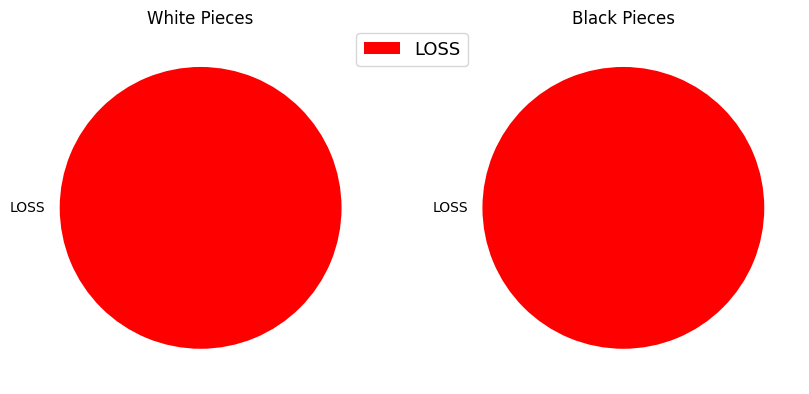

In [29]:
pie_chart_per_color_pieces(mcts_white_df,mcts_black_df)

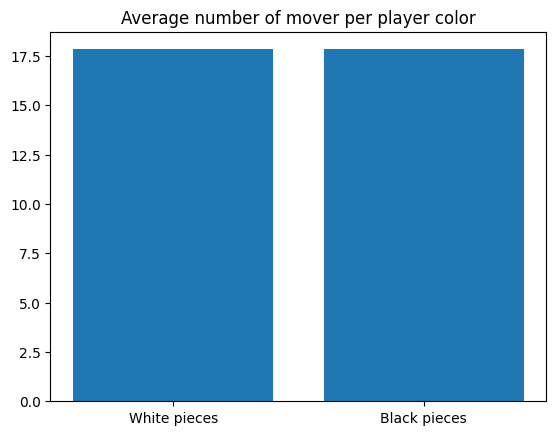

In [34]:
average_moves_per_player(mcts_white_df,mcts_black_df)

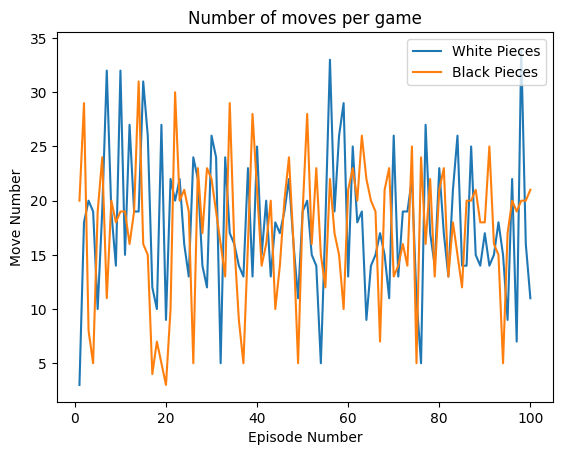

In [43]:
evaluation_number_of_moves(mcts_df)

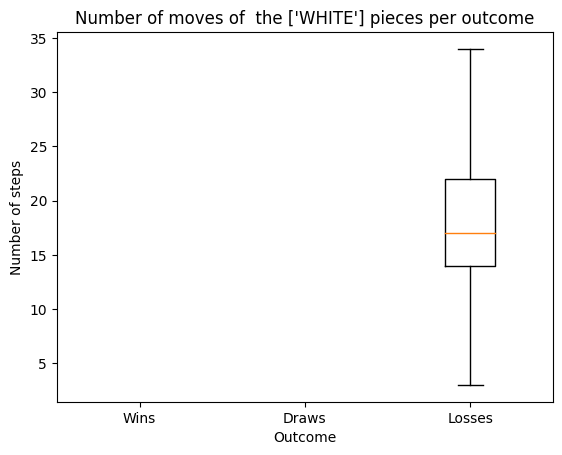

In [49]:
number_of_moves_dispersion(mcts_white_df)

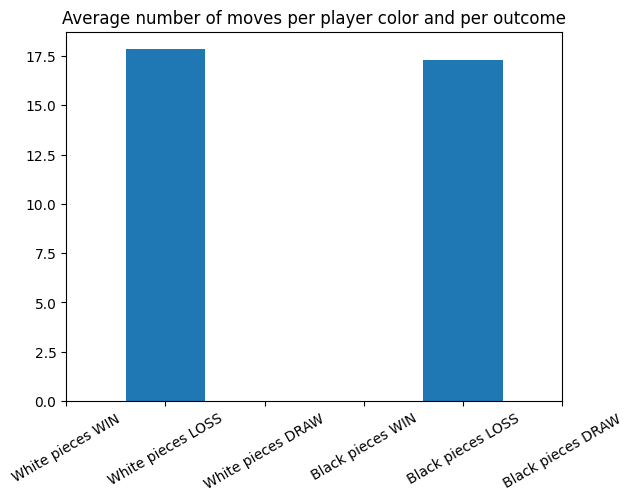

In [58]:
average_moves_per_player_per_outcome(mcts_white_df,mcts_black_df)

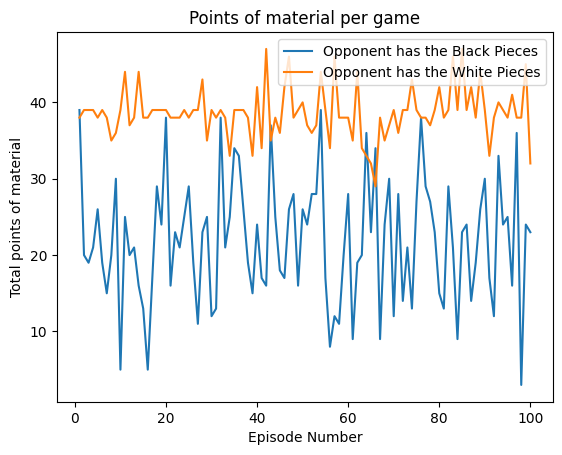

In [110]:
total_opponents_points_left_line_plot(mcts_df)

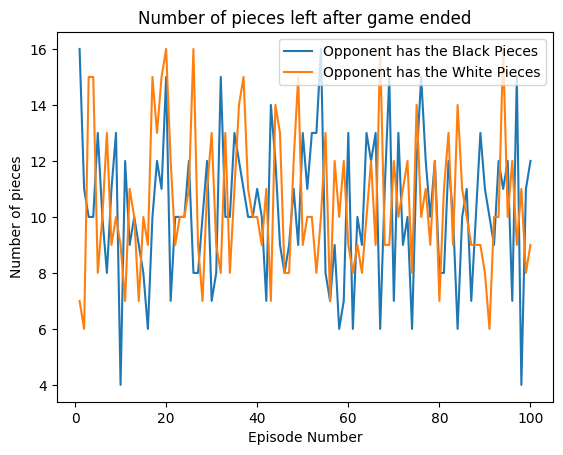

In [111]:
total_opponents_pieces_left_line_plot(mcts_df)

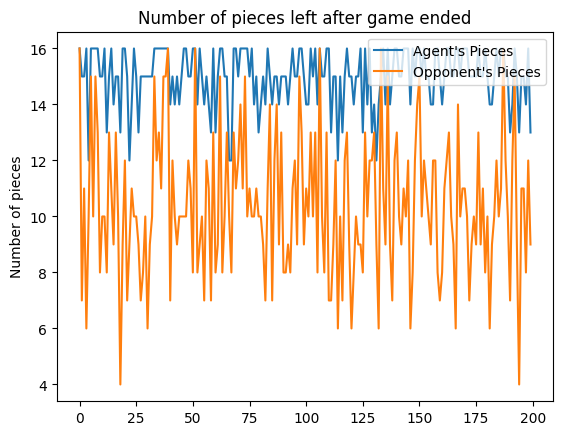

In [112]:
pieces_left_line_plot(mcts_df)

In [142]:
mcts_df['Strongest_opponent_piece'].value_counts()

queen     131
rook       64
bishop      3
pawn        2
Name: Strongest_opponent_piece, dtype: int64

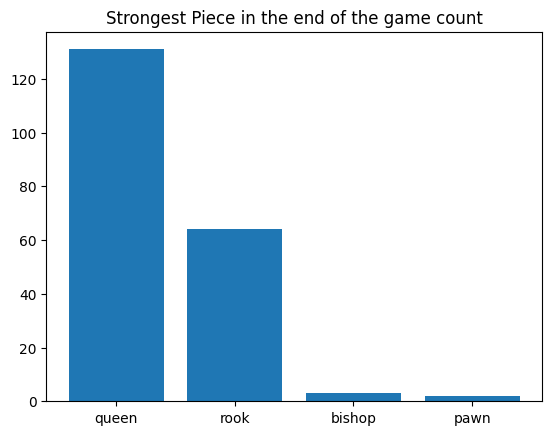

In [147]:
strongest_piece_bar_plot(mcts_df)

## SARSA

## Deep Q-Learning

### Deep Q-Learning Imitation

In [117]:
deep_q_df = pd.read_csv('/Users/nekas/Downloads/RL/project/Projeto/Final_Project.pdf/evaluation_data/deepqlearning_imitation.csv')
deep_q_df.head(3)

,Unnamed: 0,AGENT COLOR,OUTCOME,N STEPS,AGENT PIECES,OPPONENT PIECES,EPISODE,pawn,horse,knight,rook,queen,king
0,0,WHITE,LOSS,13,16,8,0,4,0,1,2,0,1
1,1,BLACK,LOSS,23,9,15,0,7,2,2,2,1,1
2,2,WHITE,LOSS,21,16,5,1,2,1,0,1,0,1


In [119]:
rename_columns(deep_q_df)
deep_q_df.head(1)

,Unnamed: 0,AGENT COLOR,OUTCOME,N STEPS,AGENT PIECES,OPPONENT PIECES,EPISODE,pawn,knight,bishop,rook,queen,king
0,0,WHITE,LOSS,13,16,8,0,4,0,1,2,0,1


In [120]:
add_episode_column(deep_q_df)
total_point_left_of_opponents_pieces(deep_q_df)
strongest_piece(deep_q_df)

,Unnamed: 0,AGENT COLOR,OUTCOME,N STEPS,AGENT PIECES,OPPONENT PIECES,EPISODE,pawn,knight,bishop,rook,queen,king,opponents_points,Strongest_opponent_piece
0,0,WHITE,LOSS,13,16,8,0,4,0,1,2,0,1,17,rook
1,1,BLACK,LOSS,23,9,15,0,7,2,2,2,1,1,38,queen
2,2,WHITE,LOSS,21,16,5,1,2,1,0,1,0,1,10,rook
3,3,BLACK,LOSS,30,9,16,1,8,2,2,2,1,1,39,queen
4,4,WHITE,LOSS,18,16,9,2,5,1,1,1,0,1,16,rook
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,1595,BLACK,LOSS,32,4,15,797,7,2,2,2,1,1,38,queen
1596,1596,WHITE,LOSS,14,15,10,798,3,2,2,2,0,1,25,rook
1597,1597,BLACK,LOSS,11,12,16,798,7,3,2,2,1,1,41,queen
1598,1598,WHITE,LOSS,21,14,8,799,4,1,1,1,0,1,15,rook


In [127]:
deep_q_df.drop('Unnamed: 0',axis=1,inplace=True)

In [128]:
deep_q_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   AGENT COLOR               1600 non-null   object
 1   OUTCOME                   1600 non-null   object
 2   N STEPS                   1600 non-null   int64 
 3   AGENT PIECES              1600 non-null   int64 
 4   OPPONENT PIECES           1600 non-null   int64 
 5   EPISODE                   1600 non-null   int64 
 6   pawn                      1600 non-null   int64 
 7   knight                    1600 non-null   int64 
 8   bishop                    1600 non-null   int64 
 9   rook                      1600 non-null   int64 
 10  queen                     1600 non-null   int64 
 11  king                      1600 non-null   int64 
 12  opponents_points          1600 non-null   int64 
 13  Strongest_opponent_piece  1600 non-null   object
dtypes: int64(11), object(3)


In [129]:
separate_player_colors(deep_q_df, 'deep_white_df', 'deep_black_df')

(     AGENT COLOR OUTCOME  N STEPS  AGENT PIECES  OPPONENT PIECES  EPISODE  \
 0          WHITE    LOSS       13            16                8        0   
 2          WHITE    LOSS       21            16                5        1   
 4          WHITE    LOSS       18            16                9        2   
 6          WHITE    LOSS       25            13                8        3   
 8          WHITE    LOSS       16            16               12        4   
 ...          ...     ...      ...           ...              ...      ...   
 1590       WHITE    LOSS       14            15                9      795   
 1592       WHITE    LOSS       18            16               11      796   
 1594       WHITE    LOSS       17            15                9      797   
 1596       WHITE    LOSS       14            15               10      798   
 1598       WHITE    LOSS       21            14                8      799   
 
       pawn  knight  bishop  rook  queen  king  opponents_poin

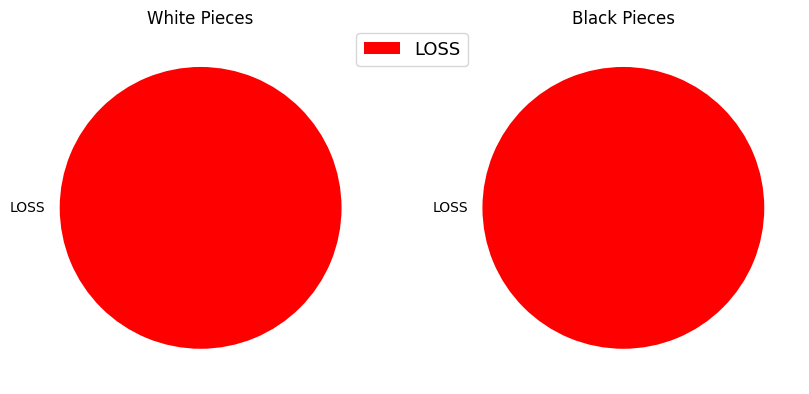

In [130]:
pie_chart_per_color_pieces(deep_white_df,deep_black_df)

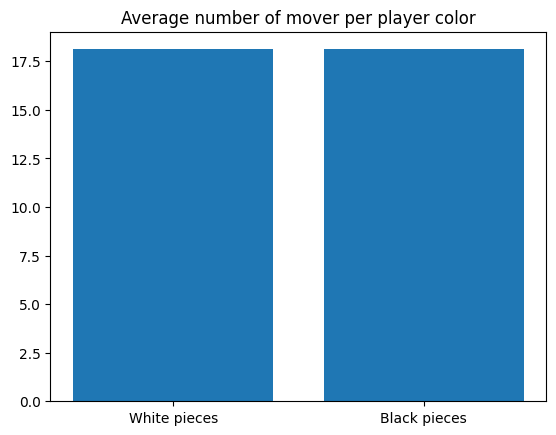

In [131]:
average_moves_per_player(deep_white_df,deep_black_df)

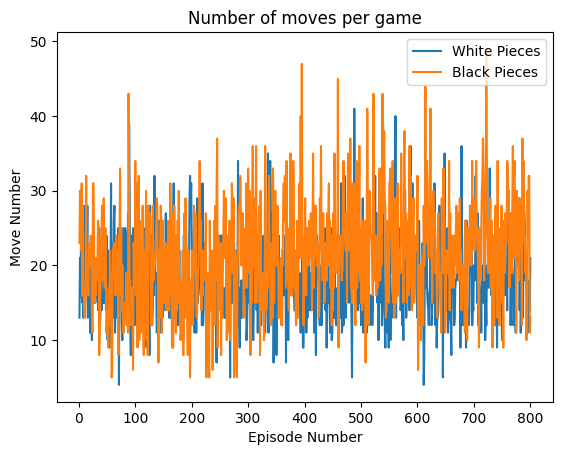

In [132]:
evaluation_number_of_moves(deep_q_df)

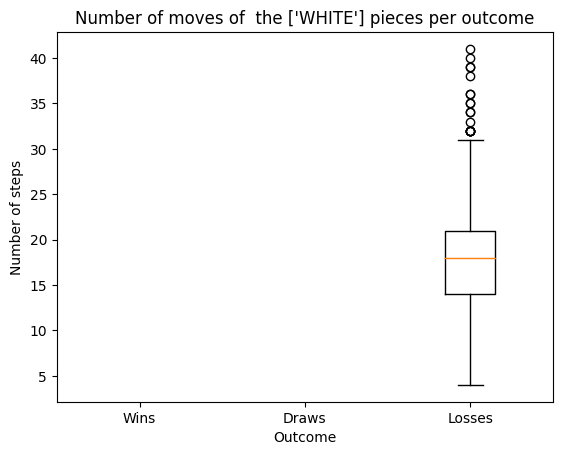

In [133]:
number_of_moves_dispersion(deep_white_df)

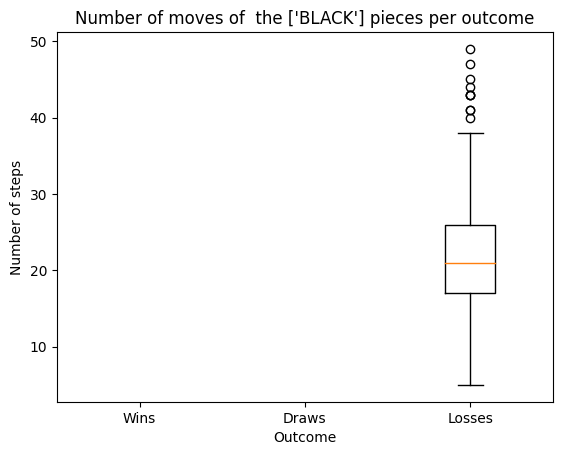

In [135]:
number_of_moves_dispersion(deep_black_df)

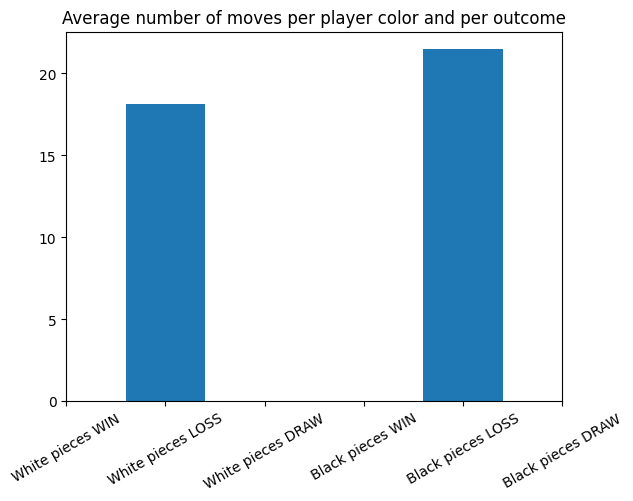

In [134]:
average_moves_per_player_per_outcome(deep_white_df,deep_black_df)

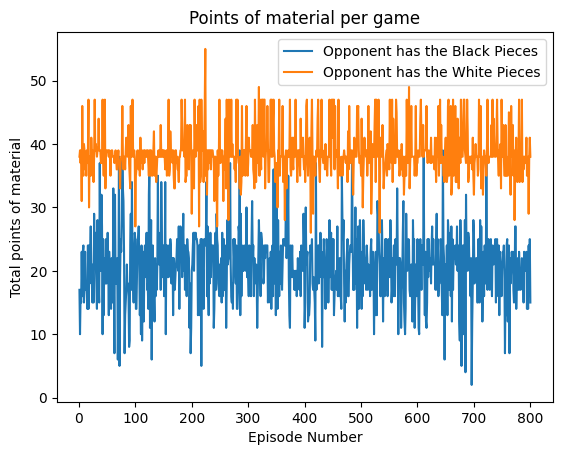

In [136]:
total_opponents_points_left_line_plot(deep_q_df)

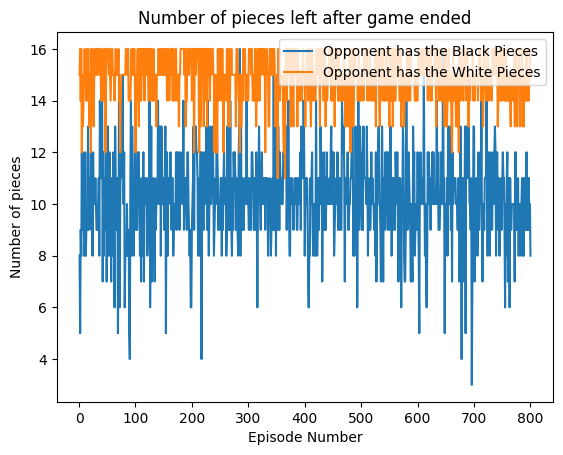

In [137]:
total_opponents_pieces_left_line_plot(deep_q_df)

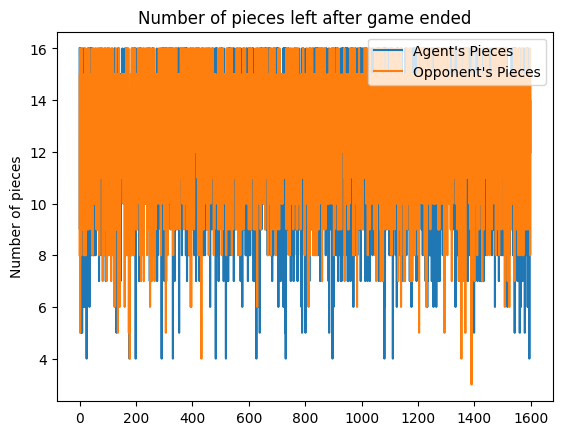

In [138]:
pieces_left_line_plot(deep_q_df)

In [140]:
deep_q_df['Strongest_opponent_piece'].value_counts()

queen     847
rook      723
bishop     15
knight     11
pawn        4
Name: Strongest_opponent_piece, dtype: int64

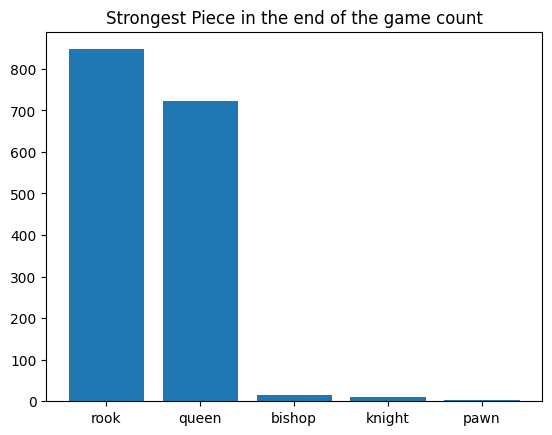

In [148]:
strongest_piece_bar_plot(deep_q_df)